# Parametric maps
For data visualization, parametric maps or _feature images_, can be useful. This notebook demonstrates how parametric maps can be made. In such parametric images, pixel intensity corresponds to  measurements of the objects, for example area.

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
from skimage.io import imread
from skimage.measure import regionprops, regionprops_table
from skimage.util import map_array
from napari_segment_blobs_and_things_with_membranes import voronoi_otsu_labeling

Starting point for drawing parametric maps is always a label image.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
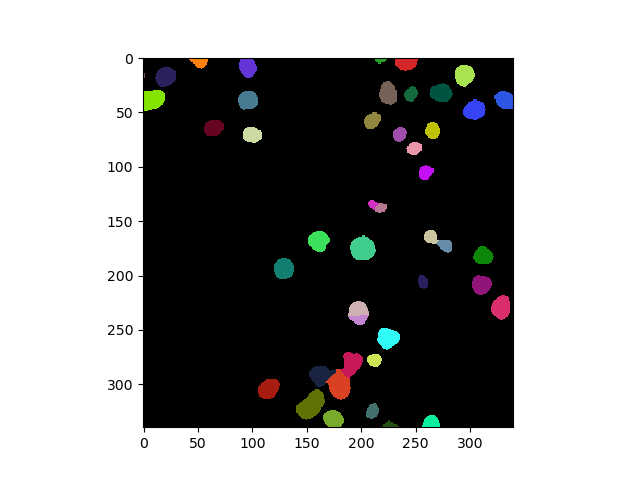

In [2]:
image = imread("../../data/BBBC007_batch/17P1_POS0013_D_1UL.tif")
labels = voronoi_otsu_labeling(image)
labels

## Parametric maps using scikit-image
You can now compute your own measurement for each object and then visualize it in a parametric map image, for example using [scikit-image's `regionprops()`](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops) for computing the measurements.

In [3]:
statistics_table = regionprops_table(cle.pull(labels), properties=('label', 'area',))

## Area map

C:\Users\rober\miniconda3\envs\devbio-napari-env4\lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:46: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


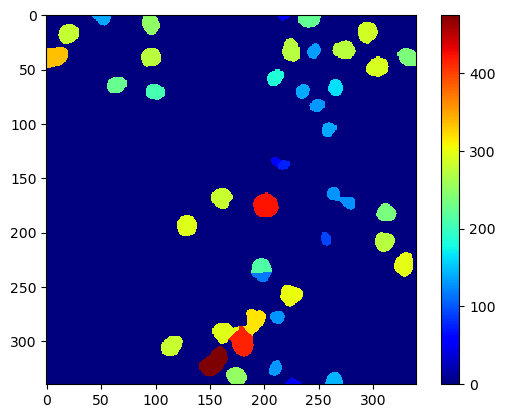

In [4]:
area_map = map_array(
        cle.pull(labels),
        statistics_table['label'],
        statistics_table['area'],
        )

cle.imshow(area_map, colorbar=True, color_map="jet")

## Parametric maps in pyclesperanto

Simpler access, also to more advanced methods for generating parametric maps are available in [pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype/blob/master/demo/tissues/parametric_maps.ipynb). It comes with some maps built-in. For example the pixel count map which is identical to the above shown area map in case the pixel size is 1.

C:\Users\rober\miniconda3\envs\devbio-napari-env4\lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:46: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


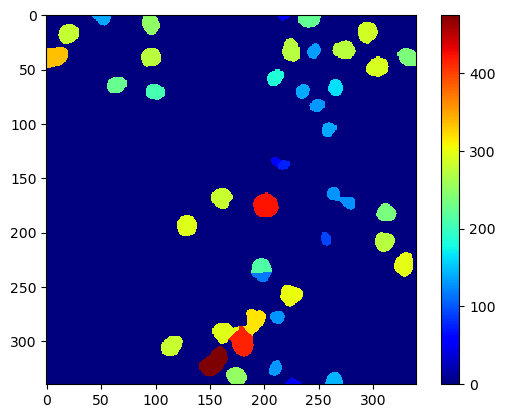

In [5]:
pixel_count_map = cle.pixel_count_map(labels)

cle.imshow(pixel_count_map, color_map='jet', colorbar=True)

Advanced methods for studying cells in tissues allow for counting for example the number of neighboring cells in a given radius.

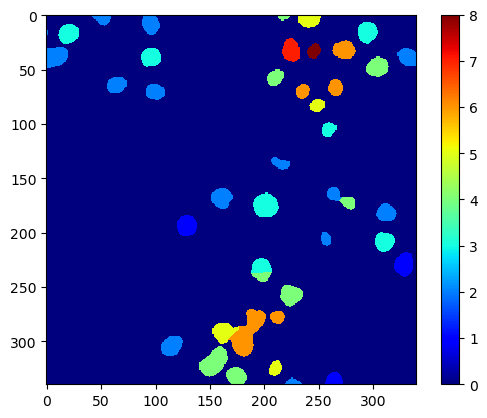

In [6]:
neighbor_count_map = cle.proximal_neighbor_count_map(labels, max_distance=50)

cle.imshow(neighbor_count_map, color_map='jet', colorbar=True)

## Visualization in napari
To visualize the parametric images on top of the original image, using napari is recommended.

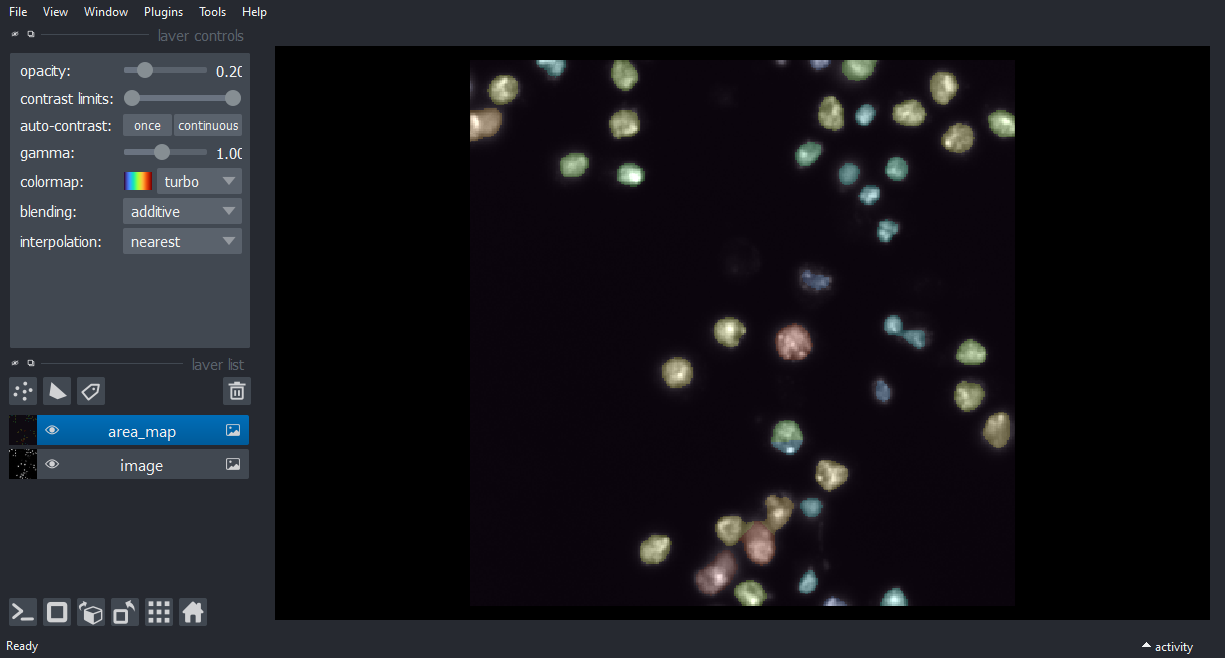

In [7]:
import napari

viewer = napari.Viewer()

viewer.add_image(image)
area_map_layer = viewer.add_image(area_map, opacity=0.2, blending="additive", colormap="turbo")

napari.utils.nbscreenshot(viewer)

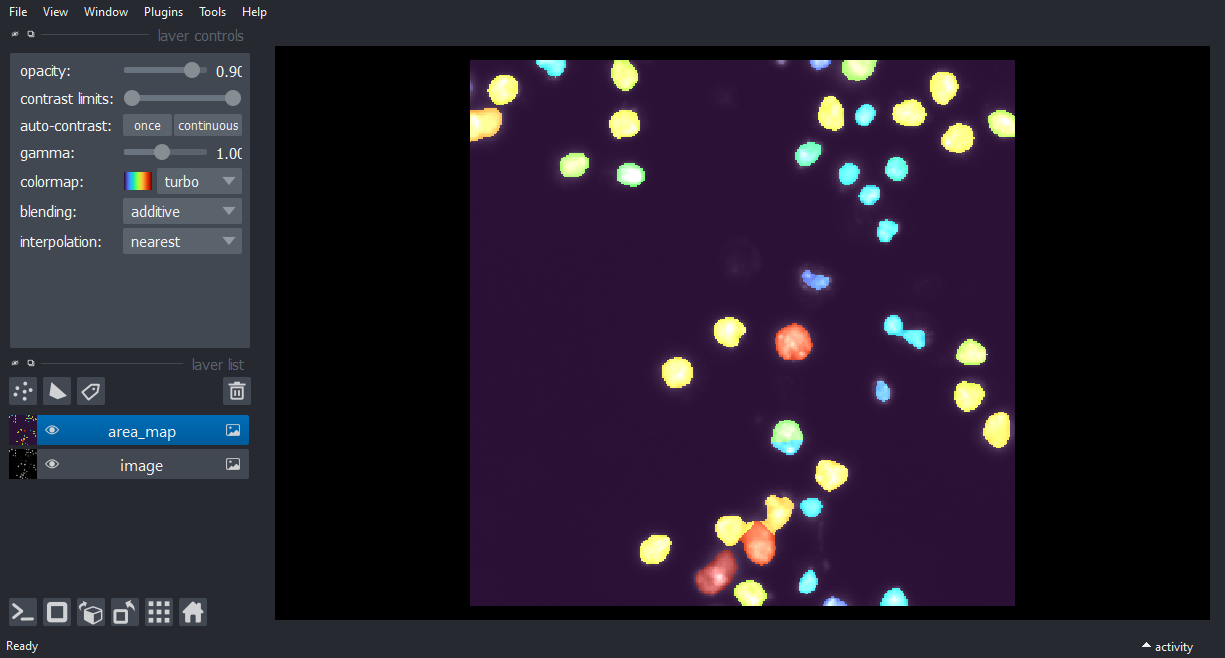

In [8]:
area_map_layer.opacity = 0.9

napari.utils.nbscreenshot(viewer)

## Exercise
Modify the code above to measure the `major_axis_length` of the objects and visualize the measurements in color in napari. The documentation of regionprops might be useful:

In [9]:
regionprops?

Signature:
regionprops(
    label_image,
    intensity_image=None,
    cache=True,
    coordinates=None,
    *,
    extra_properties=None,
)
Docstring:
Measure properties of labeled image regions.

Parameters
----------
label_image : (M, N[, P]) ndarray
    Labeled input image. Labels with value 0 are ignored.

    .. versionchanged:: 0.14.1
        Previously, ``label_image`` was processed by ``numpy.squeeze`` and
        so any number of singleton dimensions was allowed. This resulted in
        inconsistent handling of images with singleton dimensions. To
        recover the old behaviour, use
        ``regionprops(np.squeeze(label_image), ...)``.
intensity_image : (M, N[, P][, C]) ndarray, optional
    Intensity (i.e., input) image with same size as labeled image, plus
    optionally an extra dimension for multichannel data. Currently,
    this extra channel dimension, if present, must be the last axis.
    Default is None.

    .. versionchanged:: 0.18.0
        The ability to pro